# Your Final Project Title

- member 1: put their contribution here
- member 2: put their contribution here
- member 3: put their contribution here
- ...

In [23]:
#Add all Import here
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# df = 
df=pd.read_csv("2013_Boston_Bombings-ontopic_offtopic.csv")
df.head()

,tweet id,tweet,label
0,'325208201740029952',Funny how I got twenty minutes of sleep last n...,off-topic
1,'325301650791215106',I just wanna go outside,off-topic
2,'325182966332530688',This is fucking crazy. Suspect # 2 has like 2 ...,on-topic
3,'324654539850539009',"@J_Adams91 oops, someone doesn't like to be to...",off-topic
4,'323630018536275968',Let me love you @GavinQuin you know who else too,off-topic


In [4]:
# maybe delete this later
df.columns

Index(['tweet id', ' tweet', ' label'], dtype='object')

In [5]:
df.describe()

,tweet id,tweet,label
count,10012,10012,10012
unique,10012,9226,2
top,'325208201740029952',RT @DannyAmendola: I will DONATE $100 for EVER...,on-topic
freq,1,34,5648


In [25]:
# define the function
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text) # remove hashtag
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

# apply the function to your dataframe
text = df[' tweet']
df["cleaned_text"] = df[' tweet'].apply(clean_text)
df["cleaned_text"].head()

0    Funny how I got twenty minutes of sleep last n...
1                              I just wanna go outside
2    This is fucking crazy Suspect 2 has like 2 hou...
3    oops someone doesn t like to be told he s a ly...
4                Let me love you you know who else too
Name: cleaned_text, dtype: object

In [26]:
!pip install textblob

In [27]:
# write your code here: this is the sentiment analysis for the comments

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

sentiment = df[" tweet"].apply(get_sentiment)
sentiment

0        positive
1         neutral
2        negative
3         neutral
4        positive
           ...   
10007    negative
10008     neutral
10009    negative
10010    negative
10011    negative
Name:  tweet, Length: 10012, dtype: object

In [10]:
# write your code here
from nltk import ngrams

def generate_ngrams(text, n):
    tokens = text.split()
    return list(ngrams(tokens, n))

In [12]:
df["n_grams"] =df[" tweet"].apply(lambda x: generate_ngrams (x, n=2))
df["n_grams"]

0        [(Funny, how), (how, I), (I, got), (got, twent...
1        [(I, just), (just, wanna), (wanna, go), (go, o...
2        [(This, is), (is, fucking), (fucking, crazy.),...
3        [(@J_Adams91, oops,), (oops,, someone), (someo...
4        [(Let, me), (me, love), (love, you), (you, @Ga...
                               ...                        
10007    [(RT, @ISCOSEU:), (@ISCOSEU:, Boston), (Boston...
10008    [(Like, the), (the, boston), (boston, marathon...
10009    [(RT, @SportsCenter:), (@SportsCenter:, MUST),...
10010    [(RT, @iamPink_Lipss:), (@iamPink_Lipss:, So),...
10011    [(RT, @CBSNews:), (@CBSNews:, Both), (Both, FB...
Name: n_grams, Length: 10012, dtype: object

In [13]:
!pip install nltk

In [17]:
def generate_ngrams(text, n):
    tokens = text.split()
    return list(ngrams(tokens, n))

In [6]:
# Everything below this point is experimenting

In [28]:
!pip install nltk 
!pip install -U textblob

In [29]:
# Import necessary libraries
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Textblob was alr used up top

In [30]:
# Define a function for sentiment analysis using NLTK's Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [10]:
# forgot to preprocess the data earlier so lets do this again

In [37]:
# text cleaning
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#', '', text) # remove hashtag
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

df['clean_text'] = df[' tweet'].apply(clean_text)

In [38]:
# test to make sure it worked
df['clean_text']

0        Funny how I got twenty minutes of sleep last n...
1                                  I just wanna go outside
2        This is fucking crazy. Suspect 2 has like 2 ho...
3        oops, someone doesn't like to be told he's a l...
4                    Let me love you you know who else too
                               ...                        
10007    RT : Boston bombing suspects’ dad says sons we...
10008    Like the boston marathon, on a episode peter h...
10009    RT : MUST WATCH: Bruins fans sing emotional Na...
10010    RT : So that Boston bombing was fake just like...
10011    RT : Both FBI and al Qaeda struggling to ident...
Name: clean_text, Length: 10012, dtype: object

In [14]:
# Hehe sentiment scores?

In [39]:
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    """
    this function takes text as the input and calculates the sentiment score of this given text.
    """
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# get continuous textblob sentiment scores
def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

# Define a function for sentiment analysis using NLTK's Vader
def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
# get continuous textblob sentiment scores
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [40]:
df['sentiment_textblob'] = df['clean_text'].apply(get_sentiment_textblob)
df[["clean_text", "sentiment_textblob"]]

,clean_text,sentiment_textblob
0,Funny how I got twenty minutes of sleep last n...,Positive
1,I just wanna go outside,Neutral
2,This is fucking crazy. Suspect 2 has like 2 ho...,Negative
3,"oops, someone doesn't like to be told he's a l...",Neutral
4,Let me love you you know who else too,Positive
...,...,...
10007,RT : Boston bombing suspects’ dad says sons we...,Negative
10008,"Like the boston marathon, on a episode peter h...",Neutral
10009,RT : MUST WATCH: Bruins fans sing emotional Na...,Negative
10010,RT : So that Boston bombing was fake just like...,Negative


In [41]:
df['sent_textblob_cont'] = df['clean_text'].apply(get_sent_textblob_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont
0,Funny how I got twenty minutes of sleep last n...,Positive,0.166667
1,I just wanna go outside,Neutral,0.000000
2,This is fucking crazy. Suspect 2 has like 2 ho...,Negative,-0.600000
3,"oops, someone doesn't like to be told he's a l...",Neutral,0.000000
4,Let me love you you know who else too,Positive,0.500000
...,...,...,...
10007,RT : Boston bombing suspects’ dad says sons we...,Negative,-0.250000
10008,"Like the boston marathon, on a episode peter h...",Neutral,0.000000
10009,RT : MUST WATCH: Bruins fans sing emotional Na...,Negative,-0.050000
10010,RT : So that Boston bombing was fake just like...,Negative,-0.500000


In [42]:
df['sentiment_vader'] = df['clean_text'].apply(get_sentiment_vader)
df[["clean_text", "sentiment_textblob", "sentiment_vader"]]

,clean_text,sentiment_textblob,sentiment_vader
0,Funny how I got twenty minutes of sleep last n...,Positive,Positive
1,I just wanna go outside,Neutral,Neutral
2,This is fucking crazy. Suspect 2 has like 2 ho...,Negative,Negative
3,"oops, someone doesn't like to be told he's a l...",Neutral,Negative
4,Let me love you you know who else too,Positive,Positive
...,...,...,...
10007,RT : Boston bombing suspects’ dad says sons we...,Negative,Neutral
10008,"Like the boston marathon, on a episode peter h...",Neutral,Negative
10009,RT : MUST WATCH: Bruins fans sing emotional Na...,Negative,Positive
10010,RT : So that Boston bombing was fake just like...,Negative,Negative


In [43]:
# Apply sentiment analysis functions
df['sent_vader_cont'] = df['clean_text'].apply(get_sent_vader_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,Funny how I got twenty minutes of sleep last n...,Positive,0.166667,Positive,0.6597
1,I just wanna go outside,Neutral,0.000000,Neutral,0.0000
2,This is fucking crazy. Suspect 2 has like 2 ho...,Negative,-0.600000,Negative,-0.3962
3,"oops, someone doesn't like to be told he's a l...",Neutral,0.000000,Negative,-0.6715
4,Let me love you you know who else too,Positive,0.500000,Positive,0.6369
...,...,...,...,...,...
10007,RT : Boston bombing suspects’ dad says sons we...,Negative,-0.250000,Neutral,0.0000
10008,"Like the boston marathon, on a episode peter h...",Neutral,0.000000,Negative,-0.4939
10009,RT : MUST WATCH: Bruins fans sing emotional Na...,Negative,-0.050000,Positive,0.1531
10010,RT : So that Boston bombing was fake just like...,Negative,-0.500000,Negative,-0.1531


In [44]:
# wtf does this look like
df

,tweet id,tweet,label,cleaned_text,sentiment_textblob,clean_text,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,'325208201740029952',Funny how I got twenty minutes of sleep last n...,off-topic,Funny how I got twenty minutes of sleep last n...,Positive,Funny how I got twenty minutes of sleep last n...,0.166667,Positive,0.6597
1,'325301650791215106',I just wanna go outside,off-topic,I just wanna go outside,Neutral,I just wanna go outside,0.000000,Neutral,0.0000
2,'325182966332530688',This is fucking crazy. Suspect # 2 has like 2 ...,on-topic,This is fucking crazy Suspect 2 has like 2 hou...,Negative,This is fucking crazy. Suspect 2 has like 2 ho...,-0.600000,Negative,-0.3962
3,'324654539850539009',"@J_Adams91 oops, someone doesn't like to be to...",off-topic,oops someone doesn t like to be told he s a ly...,Neutral,"oops, someone doesn't like to be told he's a l...",0.000000,Negative,-0.6715
4,'323630018536275968',Let me love you @GavinQuin you know who else too,off-topic,Let me love you you know who else too,Positive,Let me love you you know who else too,0.500000,Positive,0.6369
...,...,...,...,...,...,...,...,...,...
10007,'325357142418792448',RT @ISCOSEU: Boston bombing suspects’ dad says...,on-topic,RT Boston bombing suspects dad says sons were ...,Negative,RT : Boston bombing suspects’ dad says sons we...,-0.250000,Neutral,0.0000
10008,'324425973623816193',"Like the boston marathon, on a episode peter h...",on-topic,Like the boston marathon on a episode peter ha...,Neutral,"Like the boston marathon, on a episode peter h...",0.000000,Negative,-0.4939
10009,'324674851572965376',RT @SportsCenter: MUST WATCH: Bruins fans sing...,on-topic,RT MUST WATCH Bruins fans sing emotional Natio...,Negative,RT : MUST WATCH: Bruins fans sing emotional Na...,-0.050000,Positive,0.1531
10010,'325378699237142528',RT @iamPink_Lipss: So that Boston bombing was ...,on-topic,RT So that Boston bombing was fake just like t...,Negative,RT : So that Boston bombing was fake just like...,-0.500000,Negative,-0.1531


In [45]:
# aight so apparently i need to find some way to filter this sh to only on topic labels bet

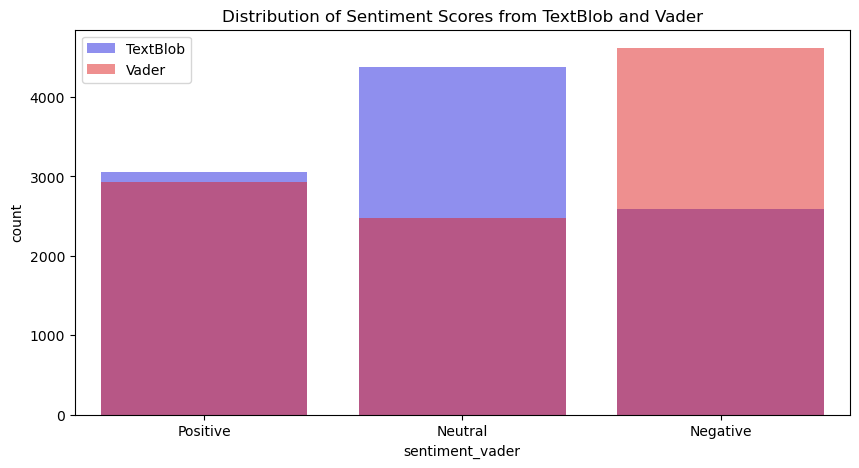

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x="sentiment_textblob", data=df, label="TextBlob", color='blue', alpha=0.5)
sns.countplot(x="sentiment_vader", data=df, label="Vader", color='red', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores from TextBlob and Vader')
plt.show()